In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlinescd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.stats import fisher_exact
os.chdir('for_pub/Figure_3')
from Figure_3_module import *

/home/pb/anaconda3/envs/R_python/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

results_a_vs_c_splice = load_csv_as_dataframe('data_files/results_a_vs_c_splice.csv')
results_b_vs_d_splice = load_csv_as_dataframe('data_files/results_b_vs_d_splice.csv')

gtf_file_path1 = 'data_files/all.flair.collapse.isoforms_event_label.gtf'

gtf_data = pd.read_csv(gtf_file_path1, sep='\t')

#load the AS event data table
asevents = pd.read_csv("data_files/ASevents_ovary.csv",sep="\t")
asevents.set_index('ids', inplace=True)

#merge the as events with the baysian table
splice_abundace_a_vs_c = pd.merge(results_a_vs_c_splice,asevents,left_index=True,right_index=True)
splice_abundace_b_vs_d = pd.merge(results_b_vs_d_splice,asevents,left_index=True,right_index=True)

splice_abundace_a_vs_c = add_multi_trans_column_to_data(splice_abundace_a_vs_c,gtf_data)
splice_abundace_b_vs_d = add_multi_trans_column_to_data(splice_abundace_b_vs_d,gtf_data)

#calculate the inclusion and exclusion event numbers
splice_abundace_a_vs_c = calculate_and_add_splicing_events(splice_abundace_a_vs_c)
splice_abundace_b_vs_d = calculate_and_add_splicing_events(splice_abundace_b_vs_d)

/tmp/ipykernel_21219/1100329890.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gtf_data = pd.read_csv(gtf_file_path1, sep='\t')


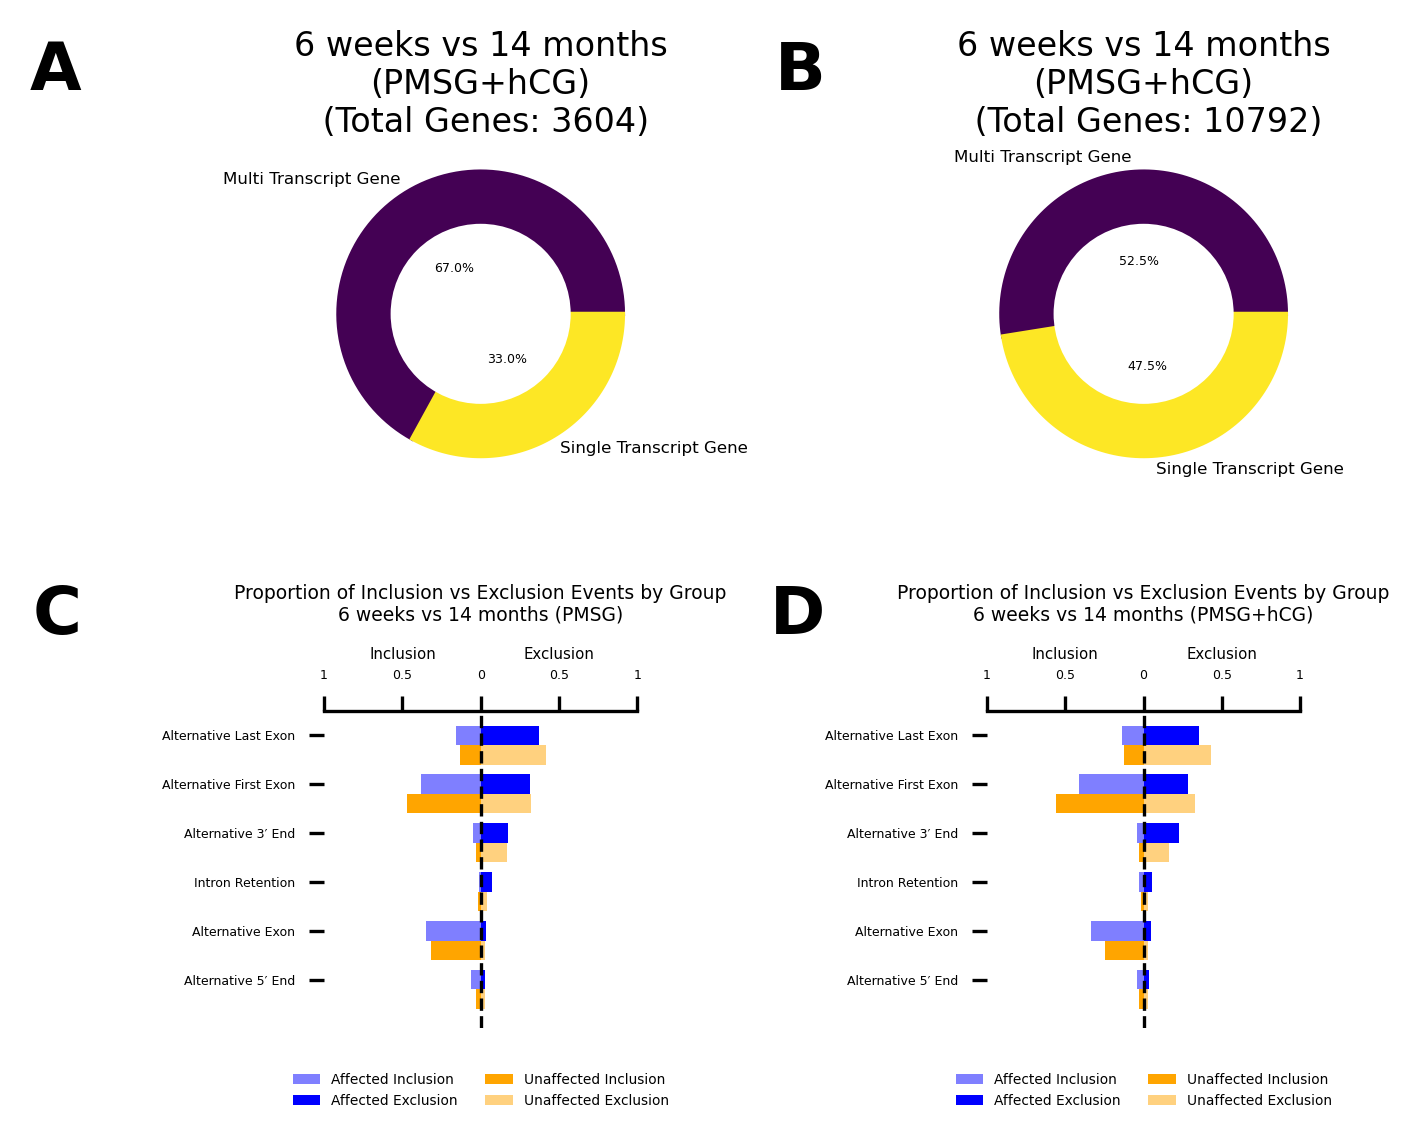

In [3]:
fig = plt.figure(figsize=(8,11),dpi=300)


# Create a GridSpec with 2 rows of different heights and 2 columns
gs = gridspec.GridSpec(5, 17, height_ratios=[1,1,1,1,1], hspace=.75,wspace=.2, figure=fig)  # Example: [4, 1, 2] for 3 rows

ax1 = fig.add_subplot(gs[0, 1:4])
ax2 = fig.add_subplot(gs[0, 7:10])
ax3 = fig.add_subplot(gs[1, 1:4])
ax4 = fig.add_subplot(gs[1, 7:10])

event_order = ['Alternative Exon', 'Intron Retention', 'Alternative 5′ End',  'Alternative 3′ End', 'Alternative First Exon', 'Alternative Last Exon']
ac_both_I = save_event_table(get_updown(splice_abundace_a_vs_c,'both'), events='splice_I', table_name="figure_files/a_vs_c_I_both_splice.csv", event_order=event_order, table=True)
ac_not_I = save_event_table(get_updown(splice_abundace_a_vs_c,'not'), events='splice_I', table_name="figure_files/a_vs_c_I_not_splice.csv", event_order=event_order, table=True)
ac_both_E = save_event_table(get_updown(splice_abundace_a_vs_c,'both'), events='splice_E', table_name="figure_files/a_vs_c_E_both_splice.csv", event_order=event_order, table=True)
ac_not_E = save_event_table(get_updown(splice_abundace_a_vs_c,'not'), events='splice_E', table_name="figure_files/a_vs_c_E_not_splice.csv", event_order=event_order, table=True)

bd_both_I = save_event_table(get_updown(splice_abundace_b_vs_d,'both'), events='splice_I', table_name="figure_files/b_vs_d_I_both_splice.csv", event_order=event_order, table=True)
bd_not_I = save_event_table(get_updown(splice_abundace_b_vs_d,'not'), events='splice_I', table_name="figure_files/b_vs_d_I_not_splice.csv", event_order=event_order, table=True)
bd_both_E = save_event_table(get_updown(splice_abundace_b_vs_d,'both'), events='splice_E', table_name="figure_files/b_vs_d_E_both_splice.csv", event_order=event_order, table=True)
bd_not_E = save_event_table(get_updown(splice_abundace_b_vs_d,'not'), events='splice_E', table_name="figure_files/b_vs_d_E_not_splice.csv", event_order=event_order, table=True)

# Global Summing up the counts for each type of splicing event
custom_pie_v3(splice_abundace_a_vs_c, '6 weeks vs 14 months\n(PMSG+hCG)', 'trans', "figure_files/Fig3A_trans.csv",innerauto=True, outerauto=True, inner_pad=0.6, outer_pad=1.1,ax=ax1,axvis=False)
custom_pie_v3(splice_abundace_b_vs_d, '6 weeks vs 14 months\n(PMSG+hCG)', 'trans', "figure_files/Fig3B_trans.csv",innerauto=True, outerauto=True, inner_pad=0.6, outer_pad=1.1,ax=ax2,axvis=False)

fisher_test_ac = custom_horizontal_bar_chart_with_fisher_I_E(ac_both_I, ac_not_I, ac_both_E, ac_not_E, "Proportion of Inclusion vs Exclusion Events by Group\n6 weeks vs 14 months (PMSG)", fscale=3, ax=ax3)
fisher_test_bd = custom_horizontal_bar_chart_with_fisher_I_E(bd_both_I, bd_not_I, bd_both_E, bd_not_E,  "Proportion of Inclusion vs Exclusion Events by Group\n6 weeks vs 14 months (PMSG+hCG)",fscale=3, ax=ax4)
fisher_test_ac.to_csv("figure_files/Fig3C_fisher_exact_test.tsv",sep='\t',index=True)
fisher_test_ac.to_csv("figure_files/Fig3D_fisher_exact_test.tsv",sep='\t',index=True)


# Initialize results dictionary
chi2_results_all_types = {'Panel AB': {}}
chi2_a, p_a = perform_chi_squared_test_panel_a('figure_files/Fig3A_trans.csv', 'figure_files/Fig3B_trans.csv')

# Adding Panel A results to the final data frame
chi2_results_all_types['Panel AB'] = {'Overall': (chi2_a, p_a)}

chi2_results_organized = {
    'Multitranscript': {
        'Panel AB': (chi2_a, p_a)  # Adding Panel A as overall
    }}
# Convert to DataFrame
chi2_results_df = pd.DataFrame(chi2_results_organized).T.applymap(lambda x: f"{x[0]:.5f}, {x[1]:.5e}" if x[0] is not None else "N/A")

# Save the updated results to CSV
chi2_results_df.to_csv('figure_files/Fig3chi_panel_3A_vs_3B.csv')


# Add context to each set before concatenating
ac_both_E["Group"] = "Inclusion - Affected"
ac_not_E["Group"] = "Inclusion - Not Affected"
ac_both_I["Group"] = "Exclusion - Affected"
ac_not_I["Group"] = "Exclusion - Not Affected"

bd_both_E["Group"] = "Inclusion - Affected"
bd_not_E["Group"] = "Inclusion - Not Affected"
bd_both_I["Group"] = "Exclusion - Affected"
bd_not_I["Group"] = "Exclusion - Not Affected"

# Combine into two main dataframes: Figure 3C and Figure 3D
fig3C_full = pd.concat([ac_both_E, ac_not_E, ac_both_I, ac_not_I])
fig3D_full = pd.concat([bd_both_E, bd_not_E, bd_both_I, bd_not_I])

fig3C_grouped = compute_groupwise_percentages(fig3C_full, "3C")
fig3D_grouped = compute_groupwise_percentages(fig3D_full, "3D")

# Combine and show to user
combined = pd.concat([fig3C_grouped, fig3D_grouped])
combined.to_csv('figure_files/Fig3_counts_proportions_panel_3C_vs_3D.csv')

splice_abundace_a_vs_c.to_csv("figure_files/splice_abundance_a_vs_c_with_splice_events_v4.csv")
splice_abundace_b_vs_d.to_csv("figure_files/splice_abundance_b_vs_d_with_splice_events_v4.csv")


# Manually set panel labels for the first plot of each row
fig.text(0.07, 0.915, 'A', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.07, 0.75, 'C', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.38, 0.915, 'B', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.38, 0.75, 'D', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)

#plt.tight_layout()
fig.savefig('figure_files/Figure_3v5.png', dpi=600)
fig.savefig('figure_files/Figure_3v5.pdf', dpi=600)
plt.show()